### Projeto: Previsão Vendas

Autora: Carolina Rocha<br>
Data: 21/11/2024

**1.Introdução**
Este projeto é uma simulação e análise de um dataset fictício de vendas com 50 registros, O dataset inclui as colunas ID, Data, Produto, Categoria, Quantidade e Preço, os dados serão limpos e tratados, realizado a  remoção de duplicatas e conversão de tipos,o resultado sera salvo no arquivo data_clean.csv;

Com o dataset limpo, foi realizadas análises, como o cálculo do total de vendas por produto e a identificação do produto com maior número de vendas totais. visualizações com  gráfico de linha para analisar tendências mensais de vendas.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('datasetFULL.csv')


df['quantidade'] = df['quantidade'].fillna(0).astype(int) 
print(df)


            data            produto categoria  quantidade  preco
0     22/11/2024      pulseira onda  pulseira          20   20.0
1     22/11/2024      pulseira rosa  pulseira          30   20.0
2     22/11/2024  brinco trio pedra    brinco          15   50.0
3     22/11/2024   brinco trio rosa    brinco           5   50.0
4     23/11/2024       anel coracao      anel          10   30.0
...          ...                ...       ...         ...    ...
1938  02/03/2024         brinco luz    brinco           9   50.0
1939  10/05/2024     conjunto terco  conjunto           7   80.0
1940  12/12/2023       anel coracao      anel           8   30.0
1941  03/08/2024            brinco1    brinco           7   50.0
1942  16/04/2024       colar pedras     colar           9   70.0

[1943 rows x 5 columns]


1.1 Identificação de valores ausentes na coluna quantidade, conversão dos dados dessas colunas para o tipo inteiro (int).


In [58]:

print(f"Valores ausentes na coluna 'quantidade': {df['quantidade'].isna().sum()}")
df['quantidade'] = df['quantidade'].fillna(0).astype(int)
df['preco'] = df['preco'].fillna(0).astype(int)
print(df)




Valores ausentes na coluna 'quantidade': 0
            data            produto categoria  quantidade  preco
0     22/11/2024      pulseira onda  pulseira          20     20
1     22/11/2024      pulseira rosa  pulseira          30     20
2     22/11/2024  brinco trio pedra    brinco          15     50
3     22/11/2024   brinco trio rosa    brinco           5     50
4     23/11/2024       anel coracao      anel          10     30
...          ...                ...       ...         ...    ...
1938  02/03/2024         brinco luz    brinco           9     50
1939  10/05/2024     conjunto terco  conjunto           7     80
1940  12/12/2023       anel coracao      anel           8     30
1941  03/08/2024            brinco1    brinco           7     50
1942  16/04/2024       colar pedras     colar           9     70

[1943 rows x 5 columns]


**2.Exploração e coleta de dados**
Vamos explorar dados de  previsão de vendas, os dados estão em formato csv, em especial,<br> estamos interessados em explicar e analisar as colunas quantidade e preço

2.1 O método info() fornece informações sobre o DataFrame, como o tipo de dados de cada coluna, numeros e valores

In [59]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        1943 non-null   object
 1   produto     1943 non-null   object
 2   categoria   1943 non-null   object
 3   quantidade  1943 non-null   int32 
 4   preco       1943 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 60.8+ KB


2.2 Cálculo dos valores missing, função isna() retorna um valor booleano indicando se o valor é missing (True) ou não (False). <br>enquanto a função sum() soma os valores booleanos retornando o número total de valores missing em cada uma.

In [60]:
colunas_interesse = ['data', 'produto', 'categoria', 'quantidade', 'preco']
dataframe_interesse = df[colunas_interesse]

valores_missing = dataframe_interesse.isna().sum()
print(valores_missing)

data          0
produto       0
categoria     0
quantidade    0
preco         0
dtype: int64


2.3 Verificação de valores ausentes na coluna preço

In [61]:
print(df[df["preco"].isna()])

Empty DataFrame
Columns: [data, produto, categoria, quantidade, preco]
Index: []


2.4 Foi realizado o preenchimento dos valores ausentes, o cálculo do total de vendas e a identificação do produto com o maior total de vendas, sendo observado que o produto com a maior venda foi o "Conjunto".

In [62]:

preco_por_categoria = {
    "pulseira": 20.0,
    "anel": 30.0,
    "brinco": 50.0,
    "conjunto": 80.0,
    "colar": 70.0,
}

df["preco"] = df.apply(
    lambda row: preco_por_categoria[row["categoria"]] if pd.isna(row["preco"]) or row["preco"] == 0 else row["preco"],
    axis=1
)

df["Total de Vendas"] = df["quantidade"] * df["preco"]
print(df)

produto_mais_vendido = df.loc[df["Total de Vendas"].idxmax()]


            data            produto categoria  quantidade  preco  \
0     22/11/2024      pulseira onda  pulseira          20   20.0   
1     22/11/2024      pulseira rosa  pulseira          30   20.0   
2     22/11/2024  brinco trio pedra    brinco          15   50.0   
3     22/11/2024   brinco trio rosa    brinco           5   50.0   
4     23/11/2024       anel coracao      anel          10   30.0   
...          ...                ...       ...         ...    ...   
1938  02/03/2024         brinco luz    brinco           9   50.0   
1939  10/05/2024     conjunto terco  conjunto           7   80.0   
1940  12/12/2023       anel coracao      anel           8   30.0   
1941  03/08/2024            brinco1    brinco           7   50.0   
1942  16/04/2024       colar pedras     colar           9   70.0   

      Total de Vendas  
0               400.0  
1               600.0  
2               750.0  
3               250.0  
4               300.0  
...               ...  
1938           

2.5 Salvo o codigo em "data_clean.csv"

In [63]:
df.to_csv("data_clean.csv", index=False)

print("DataFrame limpo salvo em 'data_clean.csv':")
print(df)

DataFrame limpo salvo em 'data_clean.csv':
            data            produto categoria  quantidade  preco  \
0     22/11/2024      pulseira onda  pulseira          20   20.0   
1     22/11/2024      pulseira rosa  pulseira          30   20.0   
2     22/11/2024  brinco trio pedra    brinco          15   50.0   
3     22/11/2024   brinco trio rosa    brinco           5   50.0   
4     23/11/2024       anel coracao      anel          10   30.0   
...          ...                ...       ...         ...    ...   
1938  02/03/2024         brinco luz    brinco           9   50.0   
1939  10/05/2024     conjunto terco  conjunto           7   80.0   
1940  12/12/2023       anel coracao      anel           8   30.0   
1941  03/08/2024            brinco1    brinco           7   50.0   
1942  16/04/2024       colar pedras     colar           9   70.0   

      Total de Vendas  
0               400.0  
1               600.0  
2               750.0  
3               250.0  
4               300.

2.6 O código  calcula o total de vendas (quantidade * preço), agrupa as vendas por mês, e gera um gráfico de linha que mostra a tendência de vendas ao longo do tempo. O gráfico exibe os totais de vendas por mês, com marcadores para cada ponto

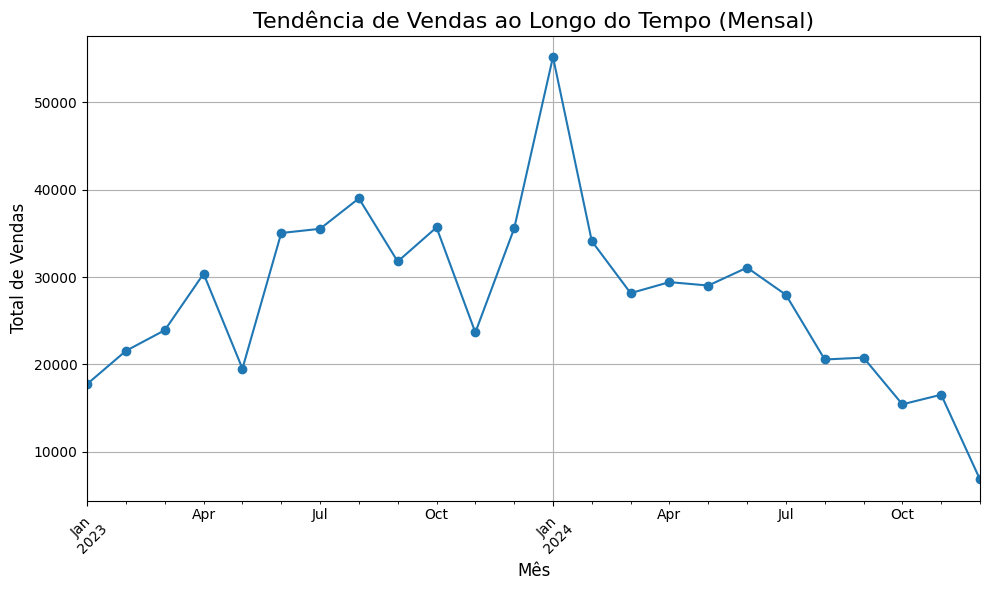

In [64]:
df = pd.DataFrame(df)


df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df["Total de Vendas"] = df["quantidade"] * df["preco"]
df['Ano_Mes'] = df['data'].dt.to_period('M')  
vendas_mensais = df.groupby('Ano_Mes')['Total de Vendas'].sum()

plt.figure(figsize=(10, 6))
vendas_mensais.plot(kind='line', marker='o')
plt.title('Tendência de Vendas ao Longo do Tempo (Mensal)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. conclusão 

O gráfico de vendas mostra um grande aumento em janeiro de 2024, o que pode ter sido causado por alguma promoção ou evento. As vendas cresceram de forma constante até metade de 2023, mas tiveram um aumento mais forte entre maio e julho. Depois do pico em janeiro de 2024, as vendas caíram bastante, o que pode indicar que a demanda voltou ao normal ou que houve uma desaceleração depois da promoção. Junho e novembro tiveram resultados mais irregulares, talvez por causa de fatores externos. De modo geral, as vendas diminuíram ao longo de 2024.